# Streategy Selection/Allocation

In [81]:
# loading in libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn import preprocessing


In [82]:
# loading in stock data 

raw = pd.read_csv('Trading_Project_Data.csv', index_col = 0, parse_dates = True, header = [0,1])

names_full = ['AAPL','AMZN', 'BA', 'CAT', 'CVX', 'GOOGL', 'GS', 'JNJ', 'JPM', 'KO','MCD', 'MSFT','NKE','NVDA','PFE','SOFI', 'TSLA', 'UNH', 'WMT','XOM']

names = ['AMZN','CAT','GS', 'JNJ','JPM','NKE','NVDA','SOFI','WMT', 'XOM']



/var/folders/ww/t2gpxbpj1dxghvgyxhxsyczm0000gn/T/ipykernel_63949/345442467.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  raw = pd.read_csv('Trading_Project_Data.csv', index_col = 0, parse_dates = True, header = [0,1])


In [107]:

stock_eod = pd.DataFrame(raw['Close']) # Gathering Closing Price data 
stock_eod = stock_eod[names]

dates = stock_eod.index
index = dates.get_loc('2024-03-01') # Cutting off data 
stock_eod_train = stock_eod[:index]

cols = stock_eod_train[names]
log_cols = []

for col in cols:
    stock_eod_train[f'log_ret_{col}'] = np.log(stock_eod_train[col]) - np.log(stock_eod_train[col].shift(1))
    log_cols.append(f'log_ret_{col}')


stock_eod_train = stock_eod_train.dropna()

stock_eod_train



/var/folders/ww/t2gpxbpj1dxghvgyxhxsyczm0000gn/T/ipykernel_63949/218811143.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_eod_train[f'log_ret_{col}'] = np.log(stock_eod_train[col]) - np.log(stock_eod_train[col].shift(1))
/var/folders/ww/t2gpxbpj1dxghvgyxhxsyczm0000gn/T/ipykernel_63949/218811143.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_eod_train[f'log_ret_{col}'] = np.log(stock_eod_train[col]) - np.log(stock_eod_train[col].shift(1))
/var/folders/ww/t2gpxbpj1dxghvgyxhxsyczm0000gn

Ticker,AMZN,CAT,GS,JNJ,JPM,NKE,NVDA,SOFI,WMT,XOM,log_ret_AMZN,log_ret_CAT,log_ret_GS,log_ret_JNJ,log_ret_JPM,log_ret_NKE,log_ret_NVDA,log_ret_SOFI,log_ret_WMT,log_ret_XOM
Date,,,,,,,,,,,,,,,,,,,,
2024-01-23,156.020004,284.544495,371.764343,154.905838,165.213226,100.181511,59.856033,7.75,53.623924,94.680328,0.007979,0.000554,-0.013538,-0.016508,-0.006606,0.013237,0.003664,-0.021698,0.002522,0.011195
2024-01-24,156.869995,286.367065,370.426758,154.081940,166.689453,99.060738,61.344608,7.56,52.866337,96.314575,0.005433,0.006385,-0.003604,-0.005333,0.008896,-0.011250,0.024565,-0.024822,-0.014229,0.017113
2024-01-25,157.750000,296.307312,373.648712,154.663498,169.074951,99.070564,61.599533,7.65,53.637096,98.761116,0.005594,0.034123,0.008660,0.003767,0.014210,0.000099,0.004147,0.011834,0.014474,0.025084
2024-01-26,159.119995,294.987213,368.854858,154.605347,168.429688,101.017174,61.013702,7.62,54.108120,99.602425,0.008647,-0.004465,-0.012913,-0.000376,-0.003824,0.019458,-0.009556,-0.003929,0.008743,0.008483
2024-01-29,161.259995,298.750549,371.559326,154.469650,168.869644,102.128113,62.447296,9.16,54.361744,99.728127,0.013359,0.012677,0.007305,-0.000878,0.002609,0.010937,0.023224,0.184070,0.004676,0.001261
2024-01-30,159.000000,300.238159,377.720093,153.897751,172.330536,102.423058,62.756203,8.40,54.542904,101.391396,-0.014114,0.004967,0.016445,-0.003709,0.020287,0.002884,0.004934,-0.086615,0.003327,0.016540
2024-01-31,155.199997,295.854156,374.927734,154.023743,170.463211,99.817757,61.509560,7.83,54.430908,99.418686,-0.024190,-0.014709,-0.007420,0.000818,-0.010895,-0.025766,-0.020065,-0.070269,-0.002055,-0.019648
2024-02-01,159.279999,303.124664,374.771515,153.500336,169.847275,100.043877,63.009136,7.73,55.438835,99.012535,0.025949,0.024278,-0.000417,-0.003404,-0.003620,0.002263,0.024087,-0.012854,0.018348,-0.004094
2024-02-02,171.809998,310.414856,378.686676,151.804047,170.824936,99.011574,66.141251,7.88,55.853863,98.606392,0.075726,0.023765,0.010393,-0.011112,0.005740,-0.010372,0.048513,0.019219,0.007458,-0.004110


In [101]:
# Computing Annulised Mean and Stdev 
an_mean = np.array(stock_eod_train[log_cols].mean() * 252)
an_sigma = np.array(stock_eod_train[log_cols].std() * np.sqrt(252))
an_mean 

array([1.23935563, 1.36021154, 0.14033404, 0.00777026, 0.83648932,
       0.3076547 , 2.6348307 , 1.17234708, 0.74215634, 0.80057225])

In [ ]:
an_vol = pd.DataFrame(an_sigma, columns = ['annulised vol'], index = [names])
an_mean = pd.DataFrame(an_mean, columns = ['annulised mean'], index = [names])

,annulised mean
AMZN,1.239356
CAT,1.360212
GS,0.140334
JNJ,0.007770
JPM,0.836489
NKE,0.307655
NVDA,2.634831
SOFI,1.172347
WMT,0.742156
XOM,0.800572


In [103]:
an_mean_norm = preprocessing.StandardScaler().fit_transform(an_mean)
an_vol_norm = preprocessing.StandardScaler().fit_transform(an_vol)

In [104]:
X = []
for i in range(0,len(an_mean_norm)):
    X.append([float(an_mean_norm[i]),float(an_vol_norm[i])])

/var/folders/ww/t2gpxbpj1dxghvgyxhxsyczm0000gn/T/ipykernel_63949/241303270.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X.append([float(an_mean_norm[i]),float(an_vol_norm[i])])


In [105]:
model = KMeans(n_clusters = 4)

model.fit(X)

y_kmeans = model.predict(X)

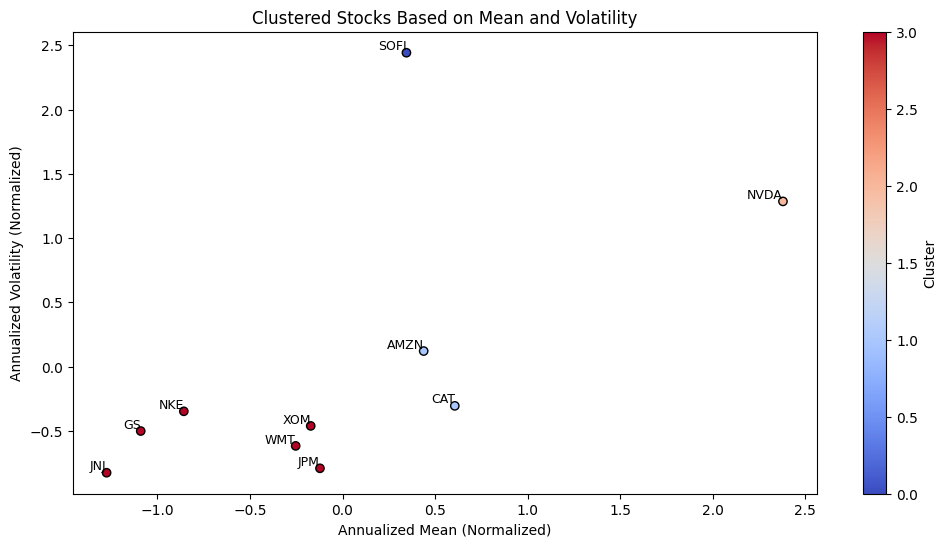

In [106]:
X = np.array(X)

plt.figure(figsize=(12, 6))

# Scatter plot with clustering
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='coolwarm', edgecolors='k')

# Annotate each point with the corresponding stock name
for i, stock in enumerate(names):
    plt.text(X[i, 0], X[i, 1], stock, fontsize=9, ha='right', va='bottom')

# Labels and Title
plt.xlabel("Annualized Mean (Normalized)")
plt.ylabel("Annualized Volatility (Normalized)")
plt.title("Clustered Stocks Based on Mean and Volatility")
plt.colorbar(label="Cluster")

plt.show()


In [90]:
raw_full = pd.DataFrame(raw['Close']) # Gathering Closing Price data 
stock_eod_full = raw_full[names]

cols = stock_eod_full[names]
log_cols = []

for col in cols:
    stock_eod_full[f'log_ret_{col}'] = np.log(stock_eod_full[col]) - np.log(stock_eod_full[col].shift(1))
    log_cols.append(f'log_ret_{col}')


stock_eod_full = stock_eod_full.dropna()

stock_eod_full



Ticker,AMZN,CAT,GS,JNJ,JPM,NKE,NVDA,SOFI,WMT,XOM,log_ret_AMZN,log_ret_CAT,log_ret_GS,log_ret_JNJ,log_ret_JPM,log_ret_NKE,log_ret_NVDA,log_ret_SOFI,log_ret_WMT,log_ret_XOM
Date,,,,,,,,,,,,,,,,,,,,
2024-01-23,156.020004,284.544495,371.764343,154.905838,165.213226,100.181511,59.856033,7.750000,53.623924,94.680328,0.007979,0.000554,-0.013538,-0.016508,-0.006606,0.013237,0.003664,-0.021698,0.002522,0.011195
2024-01-24,156.869995,286.367065,370.426758,154.081940,166.689453,99.060738,61.344608,7.560000,52.866337,96.314575,0.005433,0.006385,-0.003604,-0.005333,0.008896,-0.011250,0.024565,-0.024822,-0.014229,0.017113
2024-01-25,157.750000,296.307312,373.648712,154.663498,169.074951,99.070564,61.599533,7.650000,53.637096,98.761116,0.005594,0.034123,0.008660,0.003767,0.014210,0.000099,0.004147,0.011834,0.014474,0.025084
2024-01-26,159.119995,294.987213,368.854858,154.605347,168.429688,101.017174,61.013702,7.620000,54.108120,99.602425,0.008647,-0.004465,-0.012913,-0.000376,-0.003824,0.019458,-0.009556,-0.003929,0.008743,0.008483
2024-01-29,161.259995,298.750549,371.559326,154.469650,168.869644,102.128113,62.447296,9.160000,54.361744,99.728127,0.013359,0.012677,0.007305,-0.000878,0.002609,0.010937,0.023224,0.184070,0.004676,0.001261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-10,218.940002,349.717926,560.000000,142.059998,239.869995,71.199997,135.910004,14.150000,93.000000,106.540001,-0.014465,-0.028286,-0.035126,-0.001477,-0.013499,-0.001263,-0.030435,-0.027876,0.012987,-0.003654
2025-01-13,218.460007,361.175934,562.950012,144.470001,244.210007,72.080002,133.229996,14.070000,91.529999,109.290001,-0.002195,0.032238,0.005254,0.016822,0.017931,0.012284,-0.019916,-0.005670,-0.015933,0.025484
2025-01-14,217.759995,370.212799,571.530029,144.750000,247.470001,71.169998,131.759995,14.500000,90.790001,109.720001,-0.003209,0.024713,0.015126,0.001936,0.013261,-0.012705,-0.011095,0.030104,-0.008118,0.003927


In [ ]:
# Computing Annulised Mean and Stdev 
an_mean_full = np.array(stock_eod_full[log_cols].mean() * 252)
an_sigma_full= np.array(stock_eod_full[log_cols].std() * np.sqrt(252))


array([ 0.36033798,  0.29226164,  0.49439786, -0.06469505,  0.43140168,
       -0.33483306,  0.81935355,  0.73341536,  0.54330093,  0.17588978])

In [109]:
an_mean

,annulised mean
AMZN,1.239356
CAT,1.360212
GS,0.140334
JNJ,0.007770
JPM,0.836489
NKE,0.307655
NVDA,2.634831
SOFI,1.172347
WMT,0.742156
XOM,0.800572


In [110]:
an_vol_full = pd.DataFrame(an_sigma_full, columns = ['annulised vol'], index = [names])
an_mean_full = pd.DataFrame(an_mean_full, columns = ['annulised mean'], index = [names])
an_mean_full

,annulised mean
AMZN,0.360338
CAT,0.292262
GS,0.494398
JNJ,-0.064695
JPM,0.431402
NKE,-0.334833
NVDA,0.819354
SOFI,0.733415
WMT,0.543301
XOM,0.175890


In [93]:
an_mean_norm_full = preprocessing.StandardScaler().fit_transform(an_mean_full)
an_vol_norm_full = preprocessing.StandardScaler().fit_transform(an_vol_full)

In [94]:
X_full= []
for i in range(0,len(an_mean_norm_full)):
    X_full.append([float(an_mean_norm_full[i]),float(an_vol_norm_full[i])])

/var/folders/ww/t2gpxbpj1dxghvgyxhxsyczm0000gn/T/ipykernel_63949/3417480747.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_full.append([float(an_mean_norm_full[i]),float(an_vol_norm_full[i])])


In [95]:
model_full = KMeans(n_clusters = 4)

model_full.fit(X_full)

y_kmeans_full = model_full.predict(X_full)

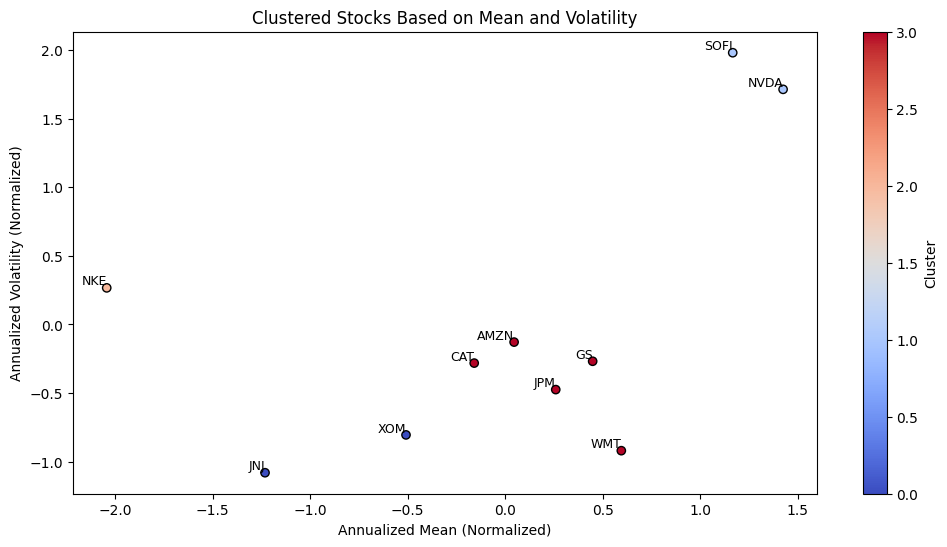

In [111]:
X_full= np.array(X_full)

plt.figure(figsize=(12, 6))

# Scatter plot with clustering
plt.scatter(X_full[:, 0], X_full[:, 1], c=y_kmeans_full, cmap='coolwarm', edgecolors='k')

# Annotate each point with the corresponding stock name
for j, stock_full in enumerate(names):
    plt.text(X_full[j, 0], X_full[j, 1], stock_full, fontsize=9, ha='right', va='bottom')

# Labels and Title
plt.xlabel("Annualized Mean (Normalized)")
plt.ylabel("Annualized Volatility (Normalized)")
plt.title("Clustered Stocks Based on Mean and Volatility")
plt.colorbar(label="Cluster")

plt.show()


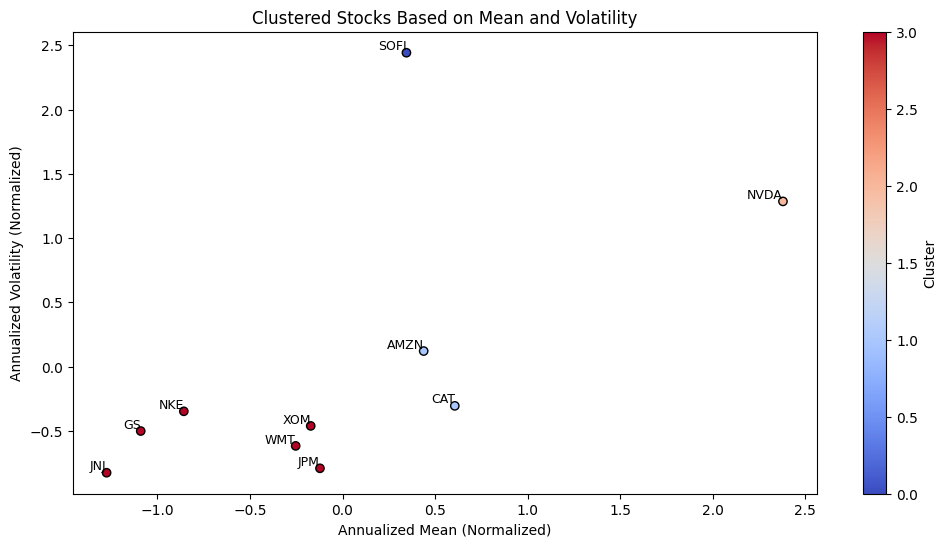

In [ ]:
X = np.array(X)

plt.figure(figsize=(12, 6))

# Scatter plot with clustering
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='coolwarm', edgecolors='k')

# Annotate each point with the corresponding stock name
for i, stock in enumerate(names):
    plt.text(X[i, 0], X[i, 1], stock, fontsize=9, ha='right', va='bottom')

# Labels and Title
plt.xlabel("Annualized Mean (Normalized)")
plt.ylabel("Annualized Volatility (Normalized)")
plt.title("Clustered Stocks Based on Mean and Volatility")
plt.colorbar(label="Cluster")

plt.show()


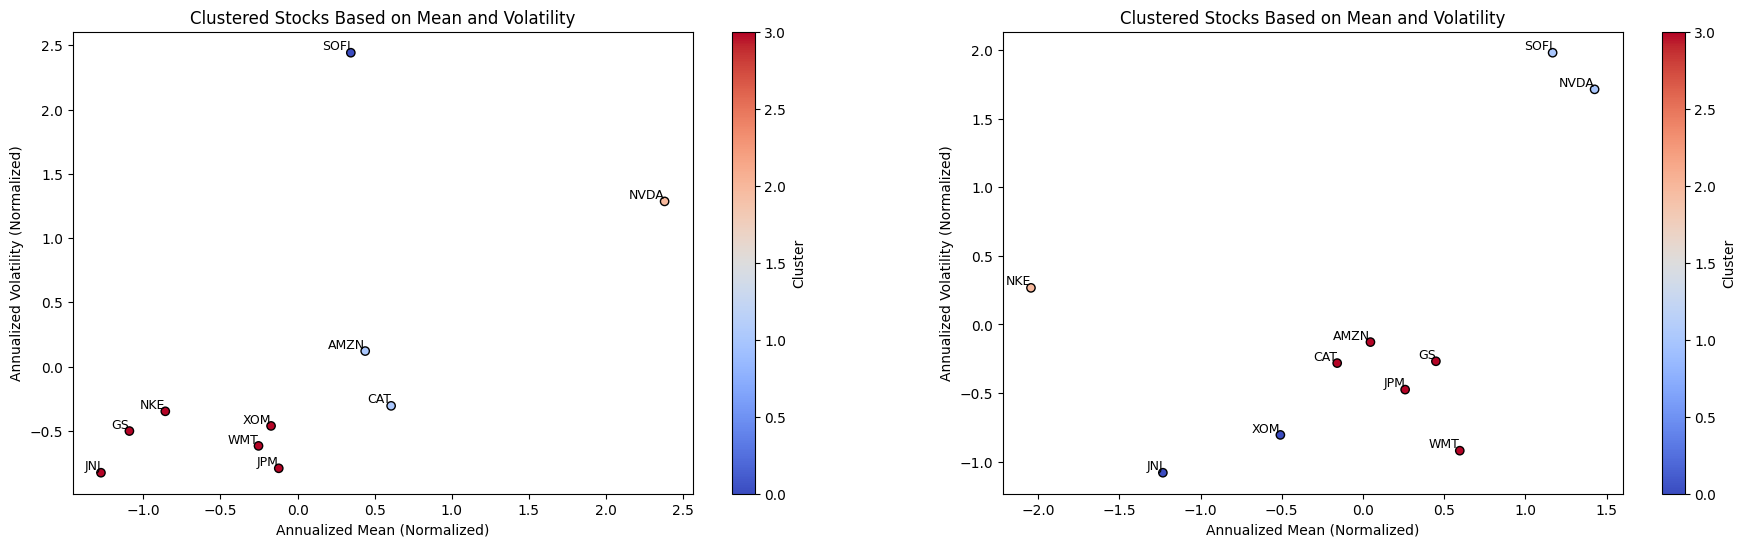

In [118]:
plt.figure(figsize = (22,6))
plt.subplot(1,2,1) # Plotting on two separate subplots 
X = np.array(X)
# Scatter plot with clustering
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='coolwarm', edgecolors='k')

# Annotate each point with the corresponding stock name
for i, stock in enumerate(names):
    plt.text(X[i, 0], X[i, 1], stock, fontsize=9, ha='right', va='bottom')

# Labels and Title
plt.xlabel("Annualized Mean (Normalized)")
plt.ylabel("Annualized Volatility (Normalized)")
plt.title("Clustered Stocks Based on Mean and Volatility")
plt.colorbar(label="Cluster")
plt.subplot(1,2,2)
X_full= np.array(X_full)

# Scatter plot with clustering
plt.scatter(X_full[:, 0], X_full[:, 1], c=y_kmeans_full, cmap='coolwarm', edgecolors='k')

# Annotate each point with the corresponding stock name
for j, stock_full in enumerate(names):
    plt.text(X_full[j, 0], X_full[j, 1], stock_full, fontsize=9, ha='right', va='bottom')

# Labels and Title
plt.xlabel("Annualized Mean (Normalized)")
plt.ylabel("Annualized Volatility (Normalized)")
plt.title("Clustered Stocks Based on Mean and Volatility")
plt.colorbar(label="Cluster")

plt.show()
